# Numerical Integration
_By Dhruv Jain_

### **Objective: Implementaion of various numerical integration schemes**

In [1]:
# Key libraries: Numpy(for mathematical procedures) and matplotlib(to create plots)
import numpy as np
import matplotlib.pyplot as plt 
import copy
from scipy.integrate import quad

## Midpoint Rule, Trapezoidal Rule, Simpson's Rule

In [2]:
def mid_pt_int(func,a,b):
    """Dhruv Jain, 18 Oct 2021
    Obj: Use Midpoint Rule to compute the integral of a function
    Args:
        func: function, function that will be integrated from a to b
        a: float, lowe limit of the integral
        b: float, upper limit of the integral
    Output:
        I: float, integral of function func from limit a to b
    """
    I = (b-a)*func((b+a)/2)
    
    return I

def trapezoidal_int(func,a,b):
    """Dhruv Jain, 18 Oct 2021
    Obj: Use Trapezoidal Rule to compute the integral of a function
    Args:
        func: function, function that will be integrated from a to b
        a: float, lowe limit of the integral
        b: float, upper limit of the integral
    Output:
        I: float, integral of function func from limit a to b
    """
    I = (b-a)/2*(func(b)+func(a))
    
    return I

def simpson_int(func,a,b):
    """Dhruv Jain, 18 Oct 2021
    Obj: Use Simpson's Rule to compute the integral of a function
    Args:
        func: function, function that will be integrated from a to b
        a: float, lowe limit of the integral
        b: float, upper limit of the integral
    Output:
        I: float, integral of function func from limit a to b
    """
    I = (b-a)/6*(func(b)+4*func((b+a)/2)+func(a))
    return I

# #Example 1

In [3]:
def func2_2(x): # Function 2
    return 8+4*np.cos(x)

# Using scipy.integrate -> quad to find analytical limit integral
a_2_2 = 0 # Lower Limit of Function 1
b_2_2 = np.pi/2 # Upper Limit of Function 1
I2_a_2 = quad(func2_2, 0, np.pi/2)

print('Analytical Integral of function: %0.6f'%I2_a_2[0])

# Midpoint Rule
I2_b_2 = mid_pt_int(func2_2, a_2_2, b_2_2)
print('\nMidpoint Rule Integral of function: %0.6f'%I2_b_2)
err_b_2 = abs(I2_a_2[0]-I2_b_2)
print('Absol Err of Function: %0.6f'%err_b_2)

# Trapezoidal Rule
I2_c_2 = trapezoidal_int(func2_2, a_2_2, b_2_2)
print('\nTrapezoidal Rule Integral of function: %0.6f'%I2_c_2)
err_c_2 = abs(I2_a_2[0]-I2_c_2)
print('Absol Err of Function: %0.6f'%err_c_2)

# Simpson's Rule
I2_d_2 = simpson_int(func2_2, a_2_2, b_2_2)
print('\nSimpson\'s Rule Integral of function: %0.6f'%I2_d_2)
err_d_2 = abs(I2_a_2[0]-I2_d_2)
print('Absol Err of Function: %0.6f'%err_d_2)

Analytical Integral of function: 16.566371

Midpoint Rule Integral of function: 17.009254
Absol Err of Function: 0.442883

Trapezoidal Rule Integral of function: 15.707963
Absol Err of Function: 0.858407

Simpson's Rule Integral of function: 16.575490
Absol Err of Function: 0.009120


## Forward Euler Method

In [4]:
# Forward Euler Method (Explicit Method)
def forward_euler(t0,tf, h, y0, func):
    """"Dhruv Jain, 31 Oct, 2021
    Obj: Uses Forward Euler's Method [y(t{k+1}) = y(tk) + h*f(yk,tk)] to solve IVP
    Args:
        t0: initial time, float
        tf: final time, float
        h: step size, float
        y0: Initial Condition, float
        func: evaluation function that describes y' and on which the bisection method is applied 
    Output:
        soln: dict, evaluated y values ['y'] and respective time steps ['t'], ndarray
    """
    # Calculate len(y), time steps, zero array for y
    N = int((tf-t0)/h)+1 
    tlen = np.linspace(t0,tf,N)
    yval = np.zeros((N),dtype = np.float64)
    
    # Setup count, use IC
    count = 1
    yval[0] = y0 
           
    while N > count:       
        yval[count] = yval[count-1] + h*func(yval[count-1],tlen[count-1]) # FORWARD EULER's METHOD
        count = count + 1
    
    soln = {}
    soln['y'] = yval
    soln['t'] = tlen
   
    return soln

## Backward Euler Method

In [5]:
# Backward Euler Method (Implicit Method)
def backward_euler(t0, tf, h, y0, func, dfunc_yk1):
    """"Dhruv Jain, 31 Oct, 2021
    Obj: Uses Backward Euler's Method [y(t{k+1}) = y(tk) + h*f(yk,tk)] to solve IVP
    Args:
        t0: initial time, float
        tf: final time, float
        h: step size, float
        y0: Initial Condition, float
        func: evaluation function that describes y' and on which the bisection method is applied 
        dfunc_yk1: 
    Output:
        soln: dict, evaluated y values ['y'] and respective time steps ['t'], ndarray
    """
    
    def backward_euler_root_f(y,yprev,t,h): # Use same func as the one passed into backward_euler()
        """"Dhruv Jain, 31 Oct, 2021, MSAAE Purdue
        Obj: f = yk+1 - (yk + h*f(yk+1,tk+1)) = 0, setup to use nonlinear algebraic solver to get yk+1
        Args:
            y: yk+1, float  
            yprev: yk, float
            t: tk+1, float
            h: step size, float
        Output:
           yk+1 - (yk + h*f(yk+1,tk+1))
        """
        return y - (yprev + h*func(y,t))

    
    # Calculate len(y), time steps, zero array for y
    N = int((tf-t0)/h)+1 
    tlen = np.linspace(t0,tf,N)
    yval = np.zeros((N),dtype = np.float64)
    
    # Setup count, use IC
    count = 1
    yval[0] = y0 
           
    while N > count:       
        yval[count] = yval[count-1] # Use yk as the inital guess of yk+1 
        
        roots,iterat = newton(yval[count], tlen[count], h, 1e-12, 50, backward_euler_root_f, dfunc_yk1) # pass yk+1 = yk (Initial Guess), tk+1 
        yval[count] = roots[-1]
        
        count = count + 1
    
    soln = {}
    soln['y'] = yval
    soln['t'] = tlen
   
    return soln

# Newton's Method for Backward Euler's Method
def newton(po, ti, h, tol, Nmax, func, dfunc):
    """Dhruv Jain, 7th Sept 2021
    This function uses Newton's method to obtain the zero of the funcion using a set inital guess for a certain tolerance and/or # iterations 
    Args:
        po: inital guess = yk, float
        ti: tk+1, float
        h: step size, float
        tol: absolute tolerance, float
        Nmax: Maximum allowable iteration, positive int
        func: Function on which the Newton's method will be applied
        dfunc: derivative of yk+1 - (yk + h*f(yk+1, tk+1)) wrt yk+1 for Newton's Method 
    Output: 
        root: Contains all the intermediate x_k+1 where the last value is the root based on Nmax and tol
        count: # iterations for which Newton's method is implemented, positive int
    """
    def g(val):
        return val - func(val, po, ti, h)/dfunc(val, ti, h)
    pk = np.zeros(Nmax+1)
    
    count = 0
    pk[0] = po 
    if count < Nmax:
        pk[count+1] = g(pk[count])
        count = count + 1
    else: 
        return None, None
    while count < Nmax and np.abs(pk[count] - pk[count-1]) > tol:
        pk[count+1] = g(pk[count])
        count = count + 1
    roots = pk[:count+1]
    return roots, count  

# #Example 2

In [6]:
# Double Precision 
h = np.array([0.1, 0.01, 0.001, 0.00001],dtype = np.float64)
t0 = 0
tf = 1
y0 = 0

def p1f(y,t):
    """"Dhruv Jain, 31 Oct, 2021
    Obj: y' expression 
    Args:
        y: yval to evaluate y', float
        t: time @ which y' to be evaluated, float
    Output:
        ydot: y', float
    """
    ydot = (np.sin(y) - np.exp(t))/np.cos(t)
    return ydot

def d_p1f_yk1(y,t,h):
    """"Dhruv Jain, 31 Oct, 2021
    Obj: Derivative of yk+1 - (yk + h*f(yk+1, tk+1)) wrt yk+1 for Newton's Method, to find the root of nonlinear algebraic expression calculated in BACKWARD EULER'S METHOD
             = 1 - ( 0 +h*cos(yk+1)/cos(tk+1))
    Args:
        y: yk+1, float
        t: tk+1, float
        h: step size, float
    Output:
        yd: derivative of yk+1 - (yk + h*f(yk+1, tk+1)) wrt yk+1, float
    """
    yd = 1-h*np.cos(y)/np.cos(t)
    return yd

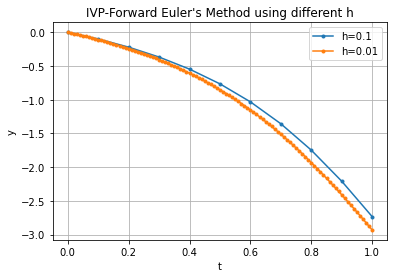

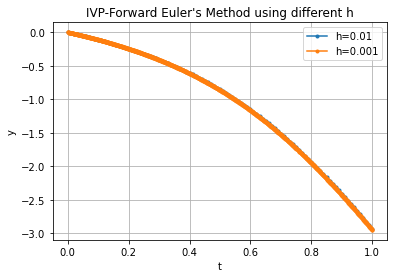

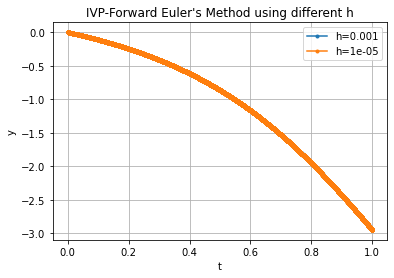

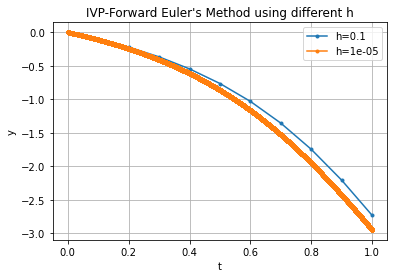

In [7]:
# Forward Euler Method
sol1_a = []

for i in range(len(h)):
    ya = forward_euler(t0,tf,h[i],y0,p1f) 
    sol1_a.append(ya)
    
#Plot
for i in range(len(h)-1):
    plt.figure(i)
    plt.title('IVP-Forward Euler\'s Method using different h')
    plt.plot(sol1_a[i]['t'][:],sol1_a[i]['y'][:],marker='.',label='h='+str(h[i]))
    plt.plot(sol1_a[i+1]['t'][:],sol1_a[i+1]['y'][:],marker='.',label='h='+str(h[i+1]))
    plt.ylabel('y')
    plt.xlabel('t')
    plt.grid()
    plt.legend()

i = i+1
plt.figure(i)
plt.title('IVP-Forward Euler\'s Method using different h')
plt.plot(sol1_a[0]['t'][:],sol1_a[0]['y'][:],marker='.',label='h='+str(h[0]))
plt.plot(sol1_a[i]['t'][:],sol1_a[i]['y'][:],marker='.',label='h='+str(h[i]))
plt.ylabel('y')
plt.xlabel('t')
plt.grid()
plt.legend()

In [8]:
print('h,  y(tf){hmin}-y(tf){hi}')
for i in range(len(h)):
    print(h[i], round(sol1_a[i]['y'][-1]-sol1_a[-1]['y'][-1],6))

h,  y(tf){hmin}-y(tf){hi}
0.1 0.217156
0.01 0.019768
0.001 0.001918
1e-05 0.0


From the above plots and the error in the final term estimated through different steps and the min step decreases. We cannot strictly comment on the accuracy of the solution as no exact solution exists, however, comparing the estimated solution found through various step sizes, we can conclude that as the step stize decreases the values are getting more accurate to a solution close to the one found using the minimum step size(h = 1e-5). The same is true for convergernce and stability as the final estimated value found from different step sizes seem to converge to a value close to the found using h=1e-5 and thus we can even say that the system is stable at the least. 

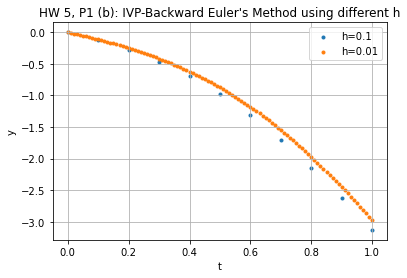

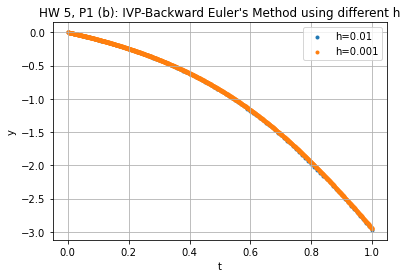

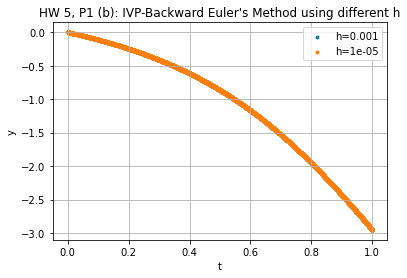

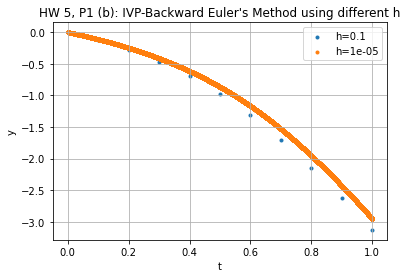

In [9]:
# Backward Euler
sol1_b = []

for i in range(len(h)):
    yb = backward_euler(t0,tf, h[i], y0, p1f, d_p1f_yk1)
    sol1_b.append(yb)
    
#Plot
for i in range(len(h)-1):
    plt.figure(i)
    plt.title('HW 5, P1 (b): IVP-Backward Euler\'s Method using different h')
    plt.scatter(sol1_b[i]['t'][:],sol1_b[i]['y'][:],marker='.',label='h='+str(h[i]))
    plt.scatter(sol1_b[i+1]['t'][:],sol1_b[i+1]['y'][:],marker='.',label='h='+str(h[i+1]))
    plt.ylabel('y')
    plt.xlabel('t')
    plt.grid()
    plt.legend()

i = i+1
plt.figure(i)
plt.title('HW 5, P1 (b): IVP-Backward Euler\'s Method using different h')
plt.scatter(sol1_b[0]['t'][:],sol1_b[0]['y'][:],marker='.',label='h='+str(h[0]))
plt.scatter(sol1_b[i]['t'][:],sol1_b[i]['y'][:],marker='.',label='h='+str(h[i]))
plt.ylabel('y')
plt.xlabel('t')
plt.grid()
plt.legend()

## Runge-Kutta $4^{th}$ order Method

In [10]:
# Fourth-Order Runge-Kutta Method for n-order -> n equations
def rk4(h, t0, tf, y0,func):
    """"Dhruv Jain, 6 Nov, 2021
    Obj: Uses Fourth-Order Runge-Kutta Method [y(t{k+1}) = y(tk) + h*(k1 +2k2 + 2k3 + k4)/6] to solve IVP for n equations based on len(y0)
    Args:
        h: step size, float
        t0: startting time, float
        tf: final time, float
        y0: inital conditions of all teh states, float ndarray
        func: state space representation of all the equations(functions)
    Output:
        soln: dict, evaluated yi values ['y'] and respective time steps ['t'], ndarray
    """
    N = int((tf-t0)/h)+1 
    tlen = np.linspace(t0,tf,N)
    yval = np.zeros((N,len(y0)),dtype = np.float64)
    
    # Setup count, use IC
    count = 1
    yval[0,:] = y0 
           
    while N > count:
        #Calculate the coefficients K1, K2, K3, K4
        k1 = func(yval[count-1], tlen[count-1])

        k2 = func(yval[count-1] + 0.5*h*k1, tlen[count-1]+0.5*h)

        k3 = func(yval[count-1] + 0.5*h*k2, tlen[count-1]+0.5*h)

        k4 = func( yval[count-1] + h*k3, tlen[count-1]+h)

        yval[count] = yval[count-1] +h*(k1 +2*k2 +2*k3 +k4)/6 # RK 4th Order Method
        
        count = count +1
    soln = {}
    soln['y'] = yval
    soln['t'] = tlen
    return soln

# Example 3
EOMs: <br> 
1) $m\ddot{x} = -D|v|\dot{x}$<br>
2) $m\ddot{y} = -D|v|\dot{y} - mg + F_n$<br>

To numerically integrate, we can rewrite the equation as system of first-order DE:<br>
$u_1 = x$<br>
$u_2 = y$ <br>
$u_3 = \dot{x}$<br>
$u_4 = \dot{y}$ <br>

$\dot{u_1} = \dot{x} = u_3$<br>
$\dot{u_2} = \dot{y} = u_4$<br>
$\dot{u_3} = \frac{-D|v|u_3}{m}$ <br>
$\dot{u_4} = \frac{-D|v|u_4 - mg + F_n}{m}$ <br>

where,<br>
$v = \sqrt{u_3^2+u_4^2}$<br>  
$F_n = k(R-u_2(t))$, u2 < R<br>
       0, u2 $\ge$ R

In [11]:
# Given values
k = 1000
R = 0.2
g = 9.81
m = 0.3
Ddum = [0, 0.01, 0.025]

def func1_xy(y,t):
    """"Dhruv Jain, 6 Nov, 2021
    Obj: State Space Formulation of the problem
    Args:
        y: yval @ tcurrent, float ndarray
        t: time @ which y' to be evaluated, float
    Output:
        dydt: y' of each state in the setup, float ndarray
    """
    
    dydt = np.zeros((len(y)))
    dydt[0] = y[2]
    dydt[1] = y[3]
    
    v = np.sqrt(y[2]**2+y[3]**2)
    if y[1] < R:
        Fn = k*(R-y[1]) 
    else:
        Fn = 0 
        
    dydt[2] = (-D*v*y[2])/m
    dydt[3] = (-D*v*y[3]-m*g + Fn)/m
    
    return dydt

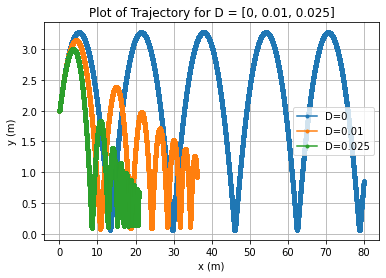

In [12]:
t0 = 0
tf = 8
h = 1e-4
ic_xy = np.array([0,2,10,5], dtype=np.float64) # x0 = 0; h = y0 = 2m; vx0 = 10 m/s; vy0 = 5 m/s

sol1_xy = []

for i in range(len(Ddum)):
    D = Ddum[i]
    solrk4 = rk4(h, t0, tf, ic_xy,func1_xy)
    sol1_xy.append(solrk4)
    
plt.figure(1)
plt.title('Plot of Trajectory for D = [0, 0.01, 0.025]')
for i in range(len(Ddum)):
    plt.plot(sol1_xy[i]['y'][:,0],sol1_xy[i]['y'][:,1],marker='.',label='D='+str(Ddum[i]))
plt.ylabel('y (m)')
plt.xlabel('x (m)')
plt.grid()
plt.legend()

## Composite Trapezoidal Rule

In [13]:
# Newton Interpolating Polynomial Function: 
def newton_interp(xi,fi,x_interp):
    """Dhruv Jain, 18 Oct, 2021
    Obj: Use Newton Form of the Interpolating Polynomial to find f(x_i) for given x_i using given (x,y) data points  
    Args:
        xi: (n x 1) vector, x-coordinates of the given data set
        fi: (n x 1) vector, y-coordinates of the given data set
        x_interp: (n_interp x 1) vector, given x-coordinate points for which we interpolate and finds its y-coordinates
    Output:
        f_interp: (n_iterp x n) vector, interpolated y-ccordinates of x_interp using Lagrange form of Interpolating Polynomial
        coeff: (n-1 x 1) vector, coefficients of Newton form of Interpolating Polynomial: f[x0], f[x0,x1], f[x0,x1,x2].......,f[x0,x1,....,xn]
    """
    n = len(xi)
    coeff = np.zeros(n)
    coeff[0] = copy.copy(fi[0]) # coeff contains all the f[x0], f[x0,x1]....f[x0,x1,.....,xn] terms 
    temp = copy.copy(fi)
    
    # Step 1: Compute f[x0], f[x0,x1] ... f[x0,x1,....xn] coeffecient values; independent of the points we want to interploate for
    for i in range(1,n):
        for j in range(n-i):
            temp[j] = (temp[j+1]-temp[j])/(xi[j+i]-xi[j])
        coeff[i] = temp[0]
    
    # Step 2: Multiply the numerator (x-x0)(x-x1)...(x-xn); dependent on x_interp, thus needs to be called len(x_interp) times
    def newton_interp_num_coeff(xval):
        """Dhruv Jain, 18 Oct, 2021
        Obj: Calculate and multiply (x-x0)(x-x1)...(x-xn) based on x_interp[i] value to get f_interp[i]
        Args:
            xval: float, value for which the interpolated value is calculated
        Output:
            sum: (n_iterp x n) vector, interpolated y-ccordinates of x_interp using Lagrange form of Interpolating Polynomial
        """
        sum = coeff[0]
        for i in range(1,n):
            temp = coeff[i]*(xval-xi[i-1])
            for j in range(1,i):
                temp = temp*(xval-xi[i-j-1])
            sum = sum + temp
        return sum
    
    # Initialize and calculate y-coord for each x_interp element
    f_interp = np.zeros(len(x_interp))
    for i in range(len(x_interp)):
        f_interp[i] = newton_interp_num_coeff(x_interp[i])   
    
    return f_interp, coeff

In [14]:
def compo_trap_rule(xdata, fdata):
    """Dhruv Jain, 18 Oct 2021
    Obj: Computes Composite Trapezoidal Rule of a given n (x,y) points
    Args:
        xdata: nx1 numpy array float, x data
        fdata: nx1 numpy array float, y data
    Output:
        ctr_integral: Composite Trapezoidal Rule (Integral)
    """
    ctr_integral = 0
    
    n = len(xdata)
    for i in range(n-1):
        ctr_integral +=  (xdata[i+1]-xdata[i])/2*(fdata[i+1]+fdata[i]) # Compute Trapezoidal Rule Integral for each interval and sum them
    
    return ctr_integral    

# #Example 4

Composite Trapezoidal Rule with 5 equal-length intervals gives an Integral value:  10.75 Nm


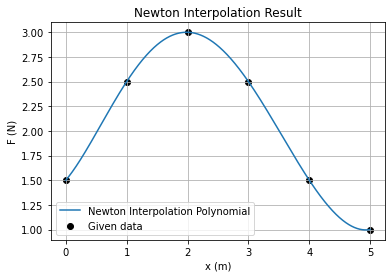

In [15]:
# Sample data
xdat = np.array([0,1,2,3,4,5])
fdat = np.array([1.5,2.5,3,2.5,1.5,1])
x_cont_dat = np.linspace(min(xdat),max(xdat),1000) # To create near-continous data set

f_cont_dat, coeff = newton_interp(xdat, fdat, x_cont_dat) # Interpolated result

n_trap = 6
xdat_b = np.linspace(min(xdat),max(xdat),n_trap) # 6 data points for 5 equal-length intervals
fdat_b,_ = newton_interp(xdat, fdat, xdat_b) # 101 f(x) using the Newton interpolating polynomial
ctr_integral = compo_trap_rule(xdat_b, fdat_b)

# Plot
plt.figure(1)
plt.title('Newton Interpolation Result')
plt.scatter(xdat,fdat,color = 'black',label='Given data')
plt.plot(x_cont_dat,f_cont_dat,label='Newton Interpolation Polynomial')
plt.ylabel('F (N)')
plt.xlabel('x (m)')
plt.grid()
plt.legend()
print('Composite Trapezoidal Rule with',n_trap-1,'equal-length intervals gives an Integral value: ',ctr_integral,'Nm')

## 2-point Gaussian Quadrature Rule
$G$(f) = $w_1f(x_1)$ + $w_2f(x_2)$ <br>
We know for [-1,1] -> $w_1$ = $w_2$ = 1, $x_1$ = -$\sqrt{1/3}$, $x_2$ = $\sqrt{1/3}$ <br>
We first map [a, b] -> [-1, 1] to use the above setup<br>

x = $\frac{(b-a)}{2}t$ + $\frac{b+a}{2}$

Jacobian = $\frac{dx}{dt}$

In [16]:
def compute_2pt_gauss_quad(func,b,a):
    """Dhruv Jain, 10 November 2021
    Obj: To compute 2 point Gaussian Quadrature Rule
    Args: 
        func: function on which the gaussian quadrature rule will be applied 
        b: Upper limit of interval
        a: Lower limit of interval
    """
    def map_2_sq(b,a,t):
        """Dhruv Jain, 10 November 2021
        Obj: Maps a value in interval [a,b] to [-1,1]
        Args: 
            b: Upper limit of interval
            a: Lower limit of interval
            t: point to be mapped
        """
        return (b-a)*0.5*t+(b+a)*0.5

    def jacobian_2pt_gauss_quad(b,a):
        """ Dhruv Jain, 10 November 2021
        Obj: Jacobian to succesfully map to [-1,1] to apply 2-point gaussian quadrature
        Args: 
            b: Upper limit of interval
            a: Lower limit of interval
        """
        return (b-a)/2
    w1 = 1
    w2 = 1
    x1 = -np.sqrt(1/3)
    x2 = np.sqrt(1/3)
    jacobian = jacobian_2pt_gauss_quad(b,a)
    return (w1*func(map_2_sq(b,a,x1)) + w2*func(map_2_sq(b,a,x2)))*jacobian

## 3-point Gaussian Quadrature Rule
For three-point Gauss Quadrature: <br>
$G_3$(f) = $w_1f(x_1)$ + $w_2f(x_2)$ + $w_3f(x_3)$ <br>
We know for [-1,1] -> $w_1$ = $w_3$ = 5/9, $w_2$ = 8/9, $x_1$ = -$\sqrt{3/5}$, $x_2$ = 0, $x_3$ = $\sqrt{3/5}$ <br>
We first map [a, b] -> [-1, 1] to use the above setup<br>

x = $\frac{(b-a)}{2}t$ + $\frac{b+a}{2}$

Jacobian = $\frac{dx}{dt}$

In [17]:
def compute_3pt_gauss_quad(func,b,a):
    """Dhruv Jain, 10 November 2021
    Obj: To compute 3 point Gaussian Quadrature Rule
    Args: 
        func: function on which the gaussian quadrature rule will be applied 
        b: Upper limit of interval
        a: Lower limit of interval
    """
    def map_2_sq(b,a,t):
        """Dhruv Jain, 10 November 2021
        Obj: Maps a value in interval [a,b] to [-1,1]
        Args: 
            b: Upper limit of interval
            a: Lower limit of interval
            t: point to be mapped
        """
        return (b-a)*0.5*t+(b+a)*0.5

    def jacobian_3pt_gauss_quad(b,a):
        """ Dhruv Jain, 10 November 2021
        Obj: Jacobian to succesfully map to [-1,1] to apply 2-point gaussian quadrature
        Args: 
            b: Upper limit of interval
            a: Lower limit of interval
        """
        return (b-a)/2

    w1 = 5/9
    w2 = 8/9
    w3 = 5/9
    x1 = -np.sqrt(3/5)
    x2 = 0
    x3 = np.sqrt(3/5)
    jacobian = jacobian_3pt_gauss_quad(b,a)
    
    return (w1*func(map_2_sq(b,a,x1)) + w2*func(map_2_sq(b,a,x2)) + w3*func(map_2_sq(b,a,x3)))*jacobian

# #Example 5

In [18]:
def func3(x):
    """"Dhruv Jain, 6 Nov, 2021
    Obj: y(x) in Example 4 using coeffecients found using Newton Interpolation
    Args:
        y(x): float, function value
    """
    y = coeff[0] + coeff[1]*(x-xdat[0]) + coeff[2]*(x-xdat[0])*(x-xdat[1]) + coeff[3]*(x-xdat[0])*(x-xdat[1])*(x-xdat[2])+ coeff[4]*(x-xdat[0])*(x-xdat[1])*(x-xdat[2])*(x-xdat[3]) + coeff[5]*(x-xdat[0])*(x-xdat[1])*(x-xdat[2])*(x-xdat[3])*(x-xdat[4])
    return y

In [19]:
# Setup
a = 0
b = 5

# Scipy.quad Integral of function
Integral_quad = quad(func3, a, b)

Integral_2pt_gq = compute_2pt_gauss_quad(func3,b,a)
Integral_3pt_gq = compute_3pt_gauss_quad(func3,b,a)

print('Scipy.quad integral value of the interploated function of data defined in Example 4:',Integral_quad[0])
print('2 point Gaussian Quadrature Rule of the interploated function of data defined in Example 4:',Integral_2pt_gq)
print('3 point Gaussian Quadrature Rule of the interploated function of data defined in Example 4:',Integral_3pt_gq)

Scipy.quad integral value of the interploated function of data defined in Example 4: 10.807291666666668
2 point Gaussian Quadrature Rule of the interploated function of data defined in Example 4: 10.264756944444445
3 point Gaussian Quadrature Rule of the interploated function of data defined in Example 4: 10.807291666666664


There is a significant difference betweeen the integral calculated using 2-point gaussian quarature rule and scipy.qauad integral of the polynomial function. The 2-point gaussian quarature rule does not exactly integrate the polynimal, but provides a good first approximate.<br>

The integral calculed using 3-point gaussian quadrature rule and scipy.quad integral of the polynomial function yeild comparable results. Thus 3-point gaussian quadrature rule gives a very good approximate of the definite integral.